# Capstone final project

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Introduction/Business Problem

Denver Colorado Is a very busy place full of grocery stores, resturants, and other small businesses. Part of this is due to the masssive inflow of people moving to Colorado for business and other factors. Since there is a lot of people moving into a place they have never been before I wanted to create a module that will help them determine the best places to live. The plan is to look at the crime in the area so people can understand the safest places to live based on the crime dataset.

## Data used

Crime data - https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime

## Methodology

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Libraries imported.


In [4]:
df = pd.read_csv('crime.csv')

In [5]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


In [6]:
df.shape

(477213, 19)

### cleaning the data

In [7]:
df1 = df.drop(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE','PRECINCT_ID', 'GEO_X', 'GEO_Y'], axis=1)

In [8]:
df1.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,-104.866156,39.755561,5,stapleton,1,0
1,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,-105.040760,39.739991,1,west-colfax,0,1
2,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,-104.999264,39.753669,6,union-station,1,0
3,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,-105.029208,39.738134,1,west-colfax,1,0
4,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,-104.828868,39.797750,5,montbello,1,0


In [9]:
df1.shape

(477213, 13)

### Analysis for data

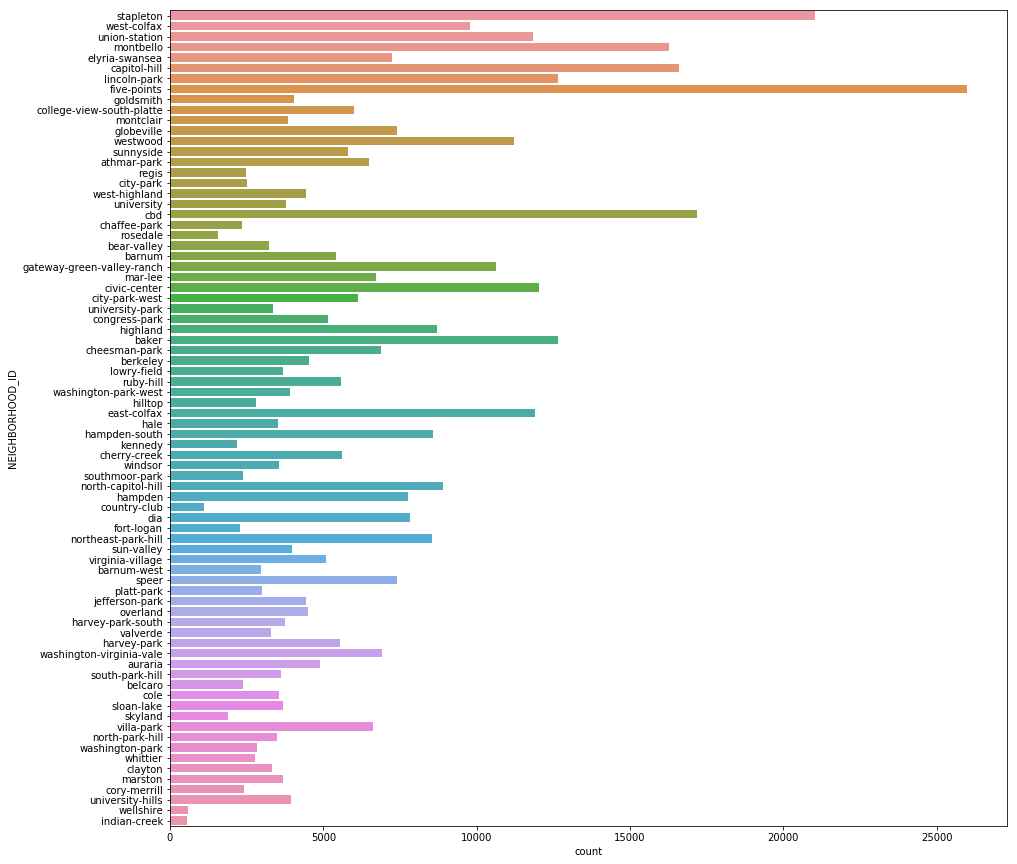

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(y='NEIGHBORHOOD_ID', data = df1, ax=ax)

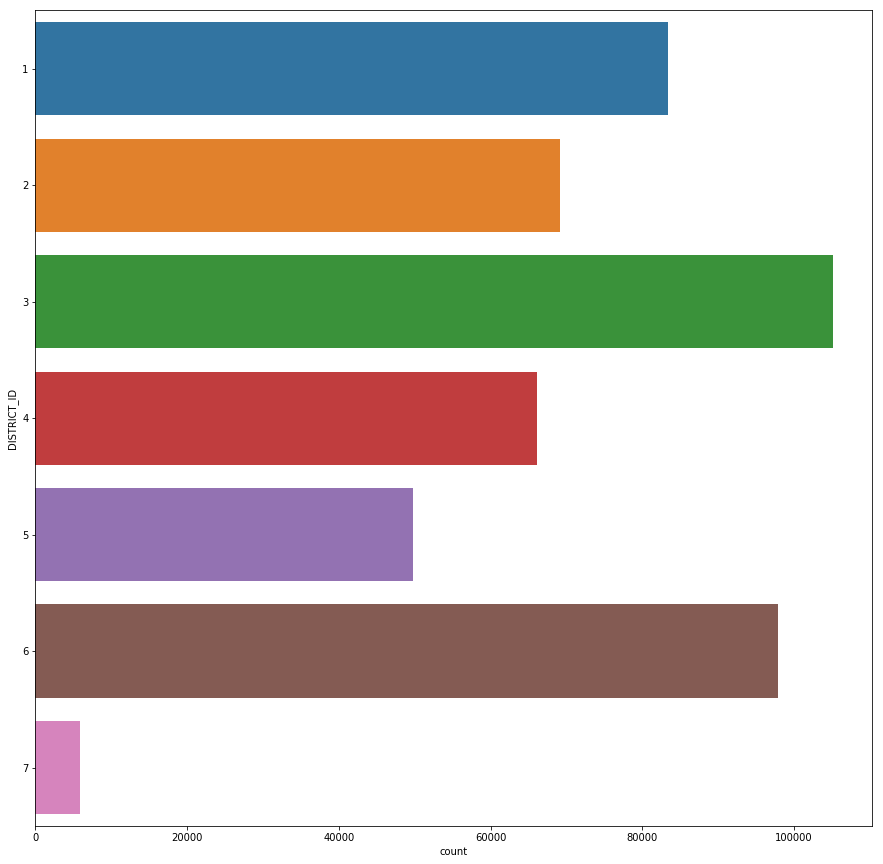

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(y='DISTRICT_ID', data = df1, ax=ax)

This graph is taking a look at the places where crime is the highest and where it is the lowest. I hope to use this to organize the data in a way that provides us with locations on the map where crime is high and places where crime is low.

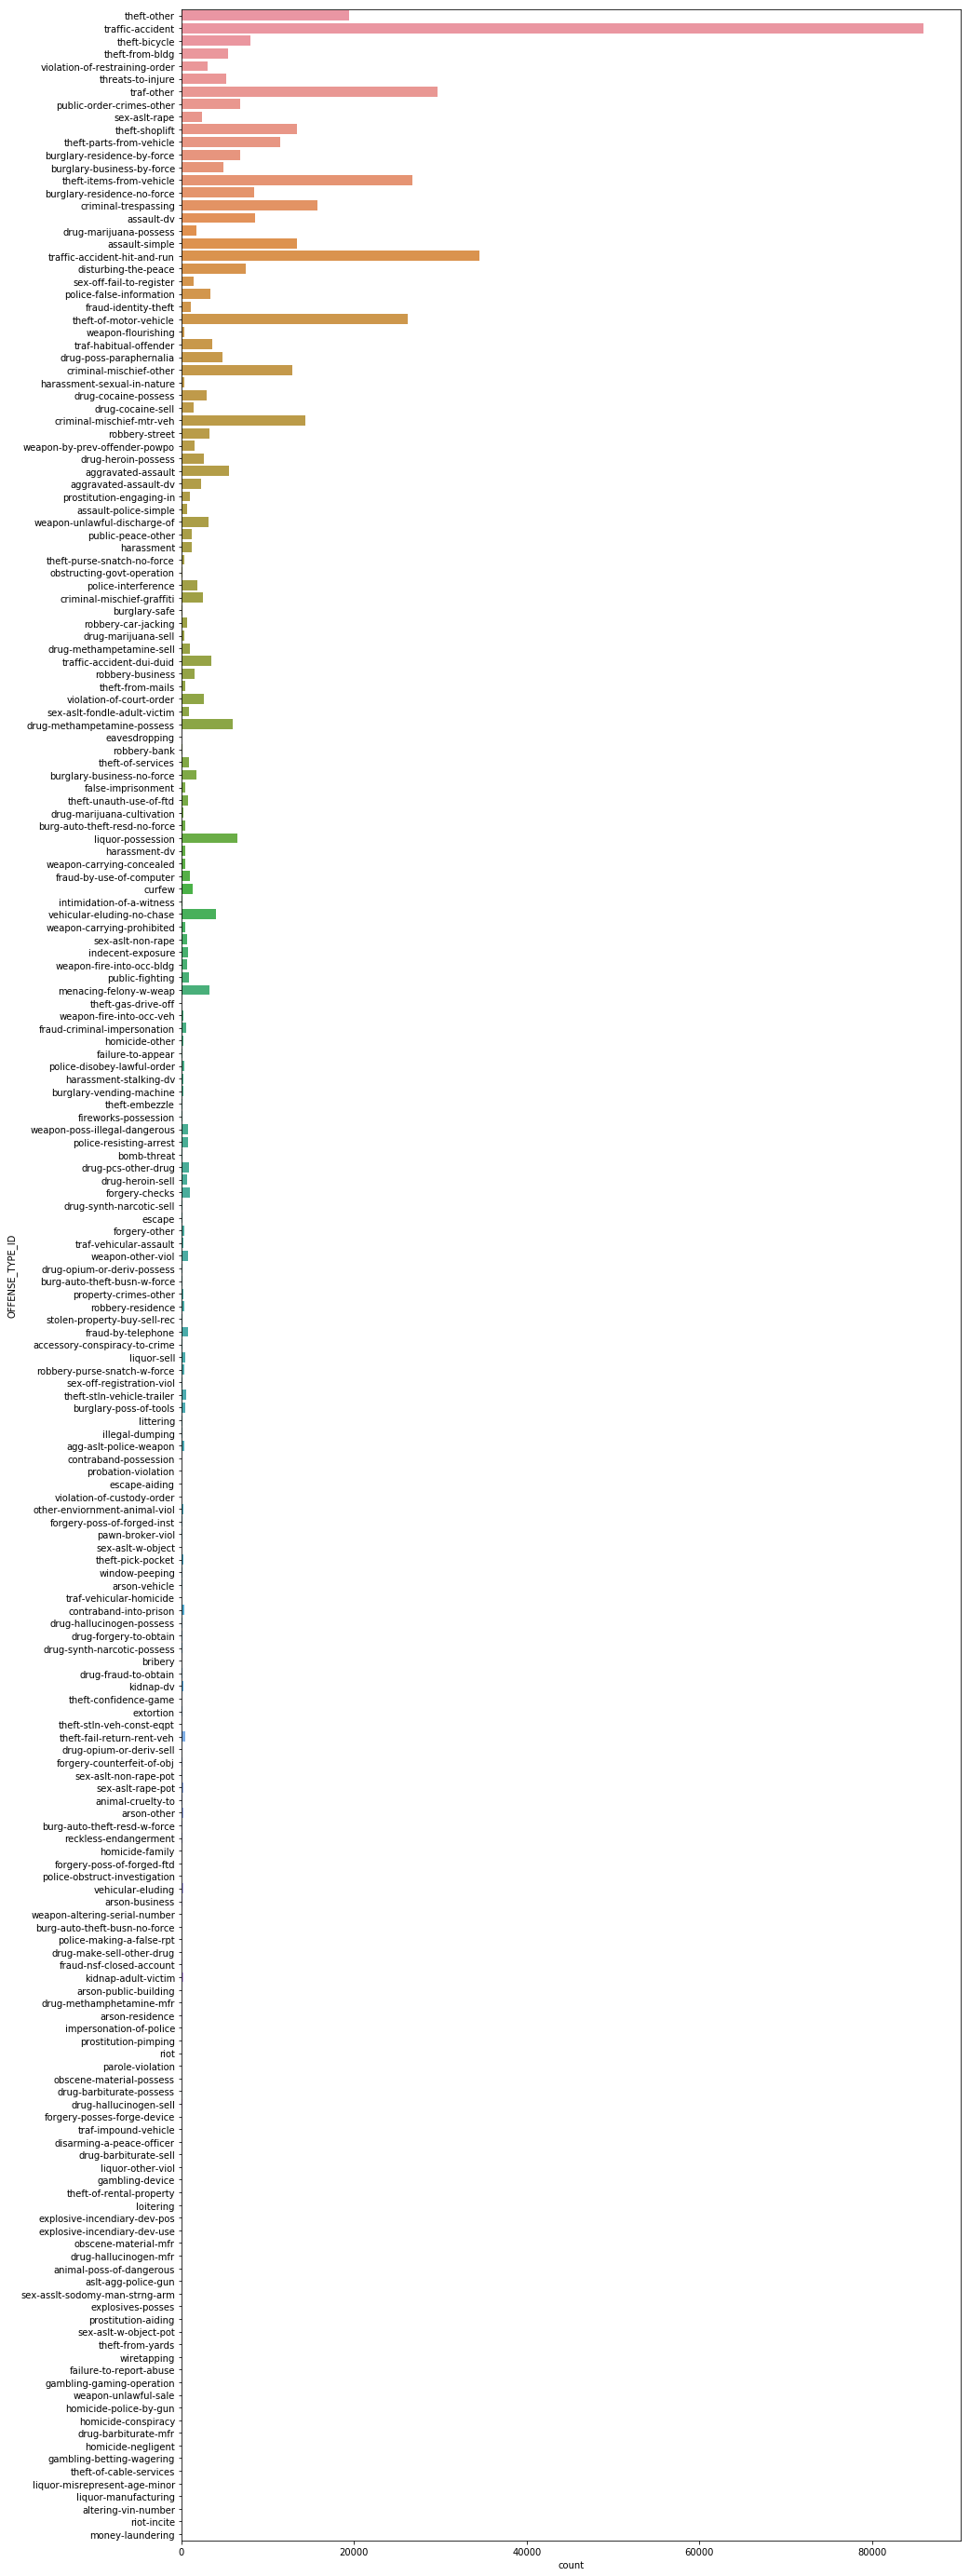

In [12]:
fig, ax = plt.subplots(figsize=(15,50))
sns.countplot(y='OFFENSE_TYPE_ID', data = df1, ax=ax)

In [13]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.barplot(x= 'DISTRICT_ID', y='OFFENSE_TYPE_ID', data = df1, ax=ax)

# max_key = df1['OFFENSE_TYPE_ID'].max()
# print(max_key)

thing = df1.sort_values('OFFENSE_TYPE_ID', ascending=False)
print(thing)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
temp = df1.groupby(['DISTRICT_ID']).count()

In [15]:
print('District data')
for DISTRICT_ID, val in zip(temp.index, temp['NEIGHBORHOOD_ID']):
    print(f'{DISTRICT_ID}: {val}')

District data
1: 83385
2: 69077
3: 105067
4: 66113
5: 49802
6: 97860
7: 5909


# Clustering

### Step One - Transform some stuff to numerica for better clustering

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
good_cluster_column = 'OFFENSE_TYPE_ID'
avg_num_words = df[good_cluster_column].apply(lambda x: len(x.split('-'))).mean()
vectorizer = CountVectorizer(binary=True, min_df=15)
output = vectorizer.fit_transform(df[good_cluster_column]).todense()
num_tokens = len(vectorizer.vocabulary_)
print("Found {} words to used in descriptions".format(num_tokens))
print("Average Descr has {} words".format(avg_num_words))

Found 241 words to used in descriptions
Average Descr has 2.9896712788628976 words


In [38]:
vocab = [''] * len(vectorizer.vocabulary_)
for word, ind in vectorizer.vocabulary_.items():
    vocab[ind] = word
transformed_df = pd.DataFrame(data=output, columns=vocab)
transformed_df['IS_CRIME'] = df['IS_CRIME']
transformed_df['IS_TRAFFIC'] = df['IS_TRAFFIC']

In [19]:
transformed_df.head()

,accessory,accident,account,adult,agg,aggravated,altering,and,animal,appear,arm,arrest,arson,aslt,assault,asslt,auto,bank,barbiturate,bicycle,bldg,bomb,bribery,broker,building,burg,burglary,business,busn,buy,by,car,carrying,chase,checks,closed,cocaine,computer,concealed,confidence,conspiracy,const,contraband,counterfeit,court,crime,crimes,criminal,cruelty,cultivation,curfew,custody,dangerous,deriv,dev,device,disarming,discharge,disobey,disturbing,drive,drug,dui,duid,dumping,dv,eluding,embezzle,endangerment,engaging,enviornment,eqpt,escape,explosive,exposure,extortion,fail,failure,false,family,felony,fighting,fire,fireworks,flourishing,fondle,force,forge,forged,forgery,fraud,from,ftd,game,gas,govt,graffiti,habitual,hallucinogen,harassment,heroin,hit,homicide,identity,illegal,impersonation,impound,imprisonment,in,incendiary,indecent,information,injure,inst,interference,intimidation,into,investigation,items,jacking,kidnap,lawful,liquor,littering,machine,mails,make,making,man,marijuana,material,menacing,methampetamine,methamphetamine,mfr,mischief,motor,mtr,narcotic,nature,no,non,nsf,number,obj,object,obscene,obstruct,obstructing,obtain,occ,of,off,offender,officer,operation,opium,or,order,other,paraphernalia,parts,pawn,pcs,peace,peeping,pick,pimping,pocket,police,pos,poss,posses,possess,possession,pot,powpo,prev,prison,probation,prohibited,property,prostitution,public,purse,rape,rec,reckless,register,registration,rent,rental,resd,residence,resisting,restraining,return,robbery,rpt,run,safe,sell,serial,services,sex,sexual,shoplift,simple,snatch,sodomy,stalking,stln,stolen,street,strng,synth,telephone,the,theft,threat,threats,to,tools,traf,traffic,trailer,trespassing,unauth,unlawful,use,veh,vehicle,vehicular,vending,victim,viol,violation,weap,weapon,window,witness
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
which = 5
print(df.iloc[which]['OFFENSE_TYPE_ID'])
transformed_df.iloc[which]

threats-to-injure


accessory          0
accident           0
account            0
adult              0
agg                0
aggravated         0
altering           0
and                0
animal             0
appear             0
arm                0
arrest             0
arson              0
aslt               0
assault            0
asslt              0
auto               0
bank               0
barbiturate        0
bicycle            0
bldg               0
bomb               0
bribery            0
broker             0
building           0
burg               0
burglary           0
business           0
busn               0
buy                0
by                 0
car                0
carrying           0
chase              0
checks             0
closed             0
cocaine            0
computer           0
concealed          0
confidence         0
conspiracy         0
const              0
contraband         0
counterfeit        0
court              0
crime              0
crimes             0
criminal     

### Step 3: Assign cluster to every record

In [21]:
num_clusters = 15
clusterer = KMeans(n_clusters=num_clusters, random_state=0)
clusterer.fit(transformed_df)
assignments = clusterer.predict(transformed_df)

In [22]:
pd.Series(assignments).value_counts()

2     89421
10    69764
3     38237
6     34480
8     33195
0     32423
7     30559
1     30178
5     26168
12    21763
13    17577
11    16295
4     15344
9     14390
14     7419
dtype: int64

In [23]:
threshold = 0.1
features = transformed_df.columns
for cluster_num, cluster_center in enumerate(clusterer.cluster_centers_):
    important = []
    for ind, val in enumerate(cluster_center):
        if val > threshold:
            important.append(features[ind])
    important = ' '.join(important)
    print("Cluster {} Important Features: {}".format(cluster_num, important))

Cluster 0 Important Features: bicycle bldg from shoplift theft
Cluster 1 Important Features: crimes order other public theft
Cluster 2 Important Features: accident traffic
Cluster 3 Important Features: from items parts theft vehicle
Cluster 4 Important Features: criminal graffiti mischief other
Cluster 5 Important Features: motor of theft vehicle
Cluster 6 Important Features: accident and hit run traffic
Cluster 7 Important Features: aggravated assault dv simple
Cluster 8 Important Features: habitual offender other traf
Cluster 9 Important Features: criminal mischief mtr veh
Cluster 10 Important Features: of to weapon
Cluster 11 Important Features: criminal trespassing
Cluster 12 Important Features: burglary business by force no residence
Cluster 13 Important Features: cocaine drug heroin marijuana methampetamine possess sell
Cluster 14 Important Features: disturbing peace the


In [24]:
df['cluster_assignment'] = assignments

In [25]:
# Dnever latitude and longitude
den_lat = 39.7392
den_lng = -104.9903

m = folium.Map([den_lat, den_lng], zoom_start=11)
m

In [41]:
good_long = ~df['GEO_LON'].isna()
good_lat = ~df['GEO_LAT'].isna()
df = df[good_lat & good_long]
# list of named folium colors
colors = ['red', 'blue', 'gray', 'darkred', 'lightred',
          'orange','beige','green','darkgreen','lightgreen',
          'darkblue','lightblue','purple','darkpurple','pink', 
          'cadetblue','lightgray','black']
# set starting point
denver_map = folium.Map([den_lat, den_lng], zoom_start=11)
# tried up to 5000, still pretty fast, not sure how high it can go before there is just too much
how_many = 5000
for index, row in df.head(how_many).iterrows():
    lat = row['GEO_LAT']
    long = row['GEO_LON']
    cluster = row['cluster_assignment']
    color = colors[cluster]
    marker = folium.CircleMarker(location=[lat, long], 
                                 color=color, 
                                 radius=1)
    marker.add_to(denver_map)

denver_map

Since there are so many data points its going to look like a blob of colors so for this map I only used 5000 of the data points. Each of the colors represents a diffrent type of crime that the algorithm grouped toghther. With this you can see what parts of Denver have what type of crimes.

## Results/findings

looking at the map that uses K means clustering, crimes per neighborhood barplot, and crimes per Distict barplot There are definetly a lot of good places to live in Denver. Based on the Districts alone any neighborhood that is within the 7th district recording 5,909 recorded crimes. The crime data does include things like traffic accendents. Traffic acceidents actually is the most recored crime in Denver which makes sense. With these finding I felt that it was better to use machine learning to try and merge similar crimes into a cluster to then be plotted on the map. I've split it into 15 diffrent clusters and it came out pretty good. Since there are so many points that I could plot on the map I had to reduce the amount that actually showed up on the map so It was somewhat coherent and understandable. While I do feel this has a lot of potential to be useful there is always room to improve to better the machine learning model.

## Conclusion

In terms of finding the best place to live you'd probably want to consider more factors like housing costs, stores in the area, etc. Based off of the findings there are plenty of neighborhoods that have fairly low rates of crime. Looking at the folium map above it appears that the more you leave the heart of Denver the lower the crimes occur, this could change with all of the points on the map but I'm pretty sure it would stay consistant.